In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
pd.__version__

'1.1.2'

# Transforming

In [3]:
sales = pd.read_csv('datasets/sales.csv', index_col='month')
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


Transform all values to dozens

In [4]:
sales.floordiv(12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


Using custom callback

In [5]:
sales.apply(lambda x: x // 12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


Transforming index

In [6]:
sales.index = sales.index.str.upper()
sales

,eggs,salt,spam
month,,,
JAN,47,12.0,17
FEB,110,50.0,31
MAR,221,89.0,72
APR,77,87.0,20
MAY,132,NaN,52
JUN,205,60.0,55


**For index there is map() function instead of apply**

In [7]:
sales.index = sales.index.map(str.lower)
sales

,eggs,salt,spam
month,,,
jan,47,12.0,17
feb,110,50.0,31
mar,221,89.0,72
apr,77,87.0,20
may,132,NaN,52
jun,205,60.0,55


## Map with dictionary

In [8]:
elections = pd.read_csv('datasets/pennsylvania2012_turnout.csv')
elections

,county,state,total,Obama,Romney,winner,voters,turnout,margin
0,Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
1,Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
2,Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
3,Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
4,Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118
...,...,...,...,...,...,...,...,...,...
62,Washington,PA,90078,42.744066,56.012567,Romney,142331,63.287689,13.268501
63,Wayne,PA,20966,38.815225,59.768196,Romney,32577,64.358290,20.952971
64,Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508
65,Wyoming,PA,11214,42.910647,55.189941,Romney,17255,64.989858,12.279294


In [9]:
red_vs_blue = {
    'Obama': 'blue',
    'Romney': 'red'
}

In [10]:
elections['color'] = elections['winner'].map(red_vs_blue)
elections

,county,state,total,Obama,Romney,winner,voters,turnout,margin,color
0,Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red
1,Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue
2,Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red
3,Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red
4,Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red
...,...,...,...,...,...,...,...,...,...,...
62,Washington,PA,90078,42.744066,56.012567,Romney,142331,63.287689,13.268501,red
63,Wayne,PA,20966,38.815225,59.768196,Romney,32577,64.358290,20.952971,red
64,Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508,red
65,Wyoming,PA,11214,42.910647,55.189941,Romney,17255,64.989858,12.279294,red


## Use vectorized functions instead of callbacks
`apply()` and `map()` work element-vise

In [11]:
elections['turnout_zscore'] = zscore(elections['turnout'])
elections

,county,state,total,Obama,Romney,winner,voters,turnout,margin,color,turnout_zscore
0,Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red,0.853734
1,Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue,0.439846
2,Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red,0.575650
3,Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red,1.018647
4,Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red,0.463391
...,...,...,...,...,...,...,...,...,...,...,...
62,Washington,PA,90078,42.744066,56.012567,Romney,142331,63.287689,13.268501,red,-0.182388
63,Wayne,PA,20966,38.815225,59.768196,Romney,32577,64.358290,20.952971,red,0.025147
64,Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508,red,1.290219
65,Wyoming,PA,11214,42.910647,55.189941,Romney,17255,64.989858,12.279294,red,0.147576


## Advanced Indexing. Hierarchical indexing

* `pandas.Index` - immutable and homogeneous id data type (like numpy array).
* `pandas.Series` - 1D array with `pandas.Index`
* `panda.DataFrame` - 2D array with columns as `pandas.Series`

You can add names for columns or index. 
**If you have multiple index, then use `df.index.names` instead of `name`**

In [12]:
sales.index.name = 'Months'
sales.columns.name = 'Products'
sales

Products,eggs,salt,spam
Months,,,
jan,47,12.0,17
feb,110,50.0,31
mar,221,89.0,72
apr,77,87.0,20
may,132,NaN,52
jun,205,60.0,55


In [13]:
state_sales = pd.read_csv('datasets/sales.csv')
state_sales['month'] = [1, 2, 1, 2, 1, 2]
state_sales['state'] = ['CA', 'CA', 'NY', 'NY', 'TX', 'TX']
state_sales = state_sales.set_index(['state', 'month']) \
    .sort_index()
state_sales

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

Use `tuple` to perform hierarchical indexing

In [14]:
# Look up data for NY in month 1 in sales: NY_month1
NY_month1 = state_sales.loc[('NY', 1)]
NY_month1

eggs    221.0
salt     89.0
spam     72.0
Name: (NY, 1), dtype: float64

In [15]:
# Look up data for CA and TX in month 2: CA_TX_month2
CA_TX_month2 = state_sales.loc[(['CA', 'TX'], 2), :]
CA_TX_month2

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
TX,2,205,60.0,55


In [16]:
# Access the inner month index and look up data for all states in month 2: all_month2
# (:, 2) - won't work inside a tuple, so use (slice(None), 2) instead!
all_month2 = state_sales.loc[(slice(None), 2), :]
all_month2

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
NY,2,77,87.0,20
TX,2,205,60.0,55


## Pivot
Requires unique values inside index column!

If you don't have unique key, then use `pivot_table` with aggegation function!

In [17]:
users = pd.DataFrame({
    'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
    'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
    'visitors': [139, 237, 326, 456],
    'signups': [7, 12, 3, 5]
})
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [18]:
users.pivot(index=['weekday'], columns=['city'], values=['visitors', 'city'])

visitors           city        
city      Austin Dallas  Austin  Dallas
weekday                                
Mon          326    456  Austin  Dallas
Sun          139    237  Austin  Dallas

### Stack and Unstack
`unstack` - removes from index adds it to columns hierarchical

In [19]:
users_indexed = users.set_index(['city', 'weekday'])
users_indexed

,,visitors,signups
city,weekday,,
Austin,Sun,139,7
Dallas,Sun,237,12
Austin,Mon,326,3
Dallas,Mon,456,5


In [20]:
users_indexed.unstack('weekday')

visitors      signups    
weekday      Mon  Sun     Mon Sun
city                             
Austin       326  139       3   7
Dallas       456  237       5  12

`stack` is opposite to unstack

In [21]:
users_indexed.unstack('weekday').stack('weekday')

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

### Swap level
swaps the level of indicies. `swaplevel` does not resort index automatically, so it's a good idea to call it yourself.

In [22]:
users_indexed.swaplevel(0, 1).sort_index()

visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12

## Melt table (opposite to pivot)

In [23]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


Let's say we have a table:

In [24]:
a_table = pd.DataFrame({
    'pseudo_uuid': ['asif', 'gsdsfasdf', '3qt4awf', 'af5eta', '2rfsafda'],
    'column_a': ['a1', 'a2', 'a3', 'a4', 'a5'],
    'column_b': ['b1', 'b2', 'b3', 'b4', 'b5'],
    'column_c': ['c1', 'c2', 'c3', 'c4', 'c5'],
    'column_d': ['d1', 'd2', 'd3', 'd4', 'd5']
})
a_table

,pseudo_uuid,column_a,column_b,column_c,column_d
0,asif,a1,b1,c1,d1
1,gsdsfasdf,a2,b2,c2,d2
2,3qt4awf,a3,b3,c3,d3
3,af5eta,a4,b4,c4,d4
4,2rfsafda,a5,b5,c5,d5


In [25]:
# value_vars - is  optional and by default takes all columns that are no in id_vars
pd.melt(a_table, id_vars=['pseudo_uuid'], value_vars=['column_a', 'column_b', 'column_c', 'column_d'])

,pseudo_uuid,variable,value
0,asif,column_a,a1
1,gsdsfasdf,column_a,a2
2,3qt4awf,column_a,a3
3,af5eta,column_a,a4
4,2rfsafda,column_a,a5
5,asif,column_b,b1
6,gsdsfasdf,column_b,b2
7,3qt4awf,column_b,b3
8,af5eta,column_b,b4
9,2rfsafda,column_b,b5


In [26]:
pd.melt(users, id_vars=['weekday', 'city'])

,weekday,city,variable,value
0,Sun,Austin,visitors,139
1,Sun,Dallas,visitors,237
2,Mon,Austin,visitors,326
3,Mon,Dallas,visitors,456
4,Sun,Austin,signups,7
5,Sun,Dallas,signups,12
6,Mon,Austin,signups,3
7,Mon,Dallas,signups,5


### Obtaining key-value paits with melt

In [27]:
users_indexed

,,visitors,signups
city,weekday,,
Austin,Sun,139,7
Dallas,Sun,237,12
Austin,Mon,326,3
Dallas,Mon,456,5


In [28]:
pd.melt(users_indexed, col_level=0)

,variable,value
0,visitors,139
1,visitors,237
2,visitors,326
3,visitors,456
4,signups,7
5,signups,12
6,signups,3
7,signups,5


## Groupby

In [29]:
gapminder = pd.read_csv('datasets/gapminder_tidy.csv')
gapminder

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
...,...,...,...,...,...,...,...,...
10106,Åland,2002,NaN,81.800,26257.0,NaN,NaN,Europe & Central Asia
10107,Åland,2003,NaN,80.630,26347.0,NaN,NaN,Europe & Central Asia
10108,Åland,2004,NaN,79.880,26530.0,NaN,NaN,Europe & Central Asia
10109,Åland,2005,NaN,80.000,26766.0,NaN,NaN,Europe & Central Asia


In [30]:
gapminder_indexed = gapminder.set_index(['Year', 'region', 'Country']).sort_index()
gapminder_indexed

fertility    life  population  \
Year region             Country                                              
1964 America            Antigua and Barbuda      4.250  63.775     58653.0   
                        Argentina                3.068  65.388  21966478.0   
                        Aruba                    4.059  67.113     57031.0   
                        Bahamas                  4.220  64.189    133709.0   
                        Barbados                 4.094  62.819    234455.0   
...                                                ...     ...         ...   
2013 Sub-Saharan Africa Tanzania                 5.214  61.530  49153002.0   
                        Togo                     4.639  56.537   6412560.0   
                        Uganda                   5.867  59.209  36759274.0   
                        Zambia                   5.687  58.105  14314515.0   
                        Zimbabwe                 3.486  59.871  13327925.0   

                                             child_mortality      gdp  
Year region             Country                                        
1964 America            Antigua and Barbuda            72.78   5008.0  
                        Argentina                      57.43   8227.0  
                        Aruba                            NaN   5505.0  
                        Bahamas                        48.56  18160.0  
                        Barbados                       64.70   5681.0  
...                                                      ...      ...  
2013 Sub-Saharan Africa Tanzania                       52.60   2382.0  
                        Togo                           83.30   1346.0  
                        Uganda                         65.10   1621.0  
                        Zambia                         72.80   3800.0  
                        Zimbabwe                       83.30   1773.0  

[10111 rows x 5 columns]

In [31]:
# If you have multiple index, you can specify level with Index column names or integers.
by_year_region = gapminder_indexed.groupby(level=['Year', 'region'])

In [32]:
def spread(series: pd.Series) -> pd.Series:
    return series.max() - series.min()


aggregator = {'population': np.sum, 'child_mortality': np.mean, 'gdp': spread}

In [33]:
by_year_region.agg(aggregator)

population  child_mortality       gdp
Year region                                                             
1964 America                     4.621957e+08       113.950667   18314.0
     East Asia & Pacific         1.110668e+09       129.109130   66821.0
     Europe & Central Asia       6.988545e+08        61.585319   28734.0
     Middle East & North Africa  1.180955e+08       179.605263   38474.0
     South Asia                  6.250739e+08       256.922500     812.0
...                                       ...              ...       ...
2013 East Asia & Pacific         2.244209e+09        22.285714  134744.0
     Europe & Central Asia       8.968788e+08         9.831875   86418.0
     Middle East & North Africa  4.030504e+08        20.221500  128676.0
     South Asia                  1.701241e+09        46.287500   11469.0
     Sub-Saharan Africa          9.205996e+08        76.944490   32035.0

[300 rows x 3 columns]

In [34]:
products_2015_feb = pd.read_csv('datasets/products_2015-feb.csv', index_col='Date', parse_dates=True) \
    .sort_index()
products_2015_feb

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14
2015-02-05 02:00:00,Acme Coporation,Software,19
2015-02-05 22:00:00,Hooli,Service,10
2015-02-07 23:00:00,Acme Coporation,Hardware,1
2015-02-09 09:00:00,Streeplex,Service,19


Is there a day of the week that is more popular for customers? To find out, you're going to use `.strftime('%a')` to transform the index datetime values to abbreviated days of the week.

In [35]:
products_2015_feb.groupby(by=products_2015_feb.index.strftime('%a'))['Units'].sum()

Date
Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64

In [36]:
def my_zscore(series: pd.Series) -> pd.Series:
    return (series - series.mean()) / series.std()

### Transform vs Apply
https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object#:~:text=Two%20major%20differences%20between%20apply%20and%20transform&text=Input%3A,Series%20to%20the%20custom%20function.

There are two main differences:
1. Input:
    * apply implicitly passes all the columns for each group as a DataFrame to the custom function.
    * while transform passes each column for each group individually as a Series to the custom function.
2. Output:
    * The custom function passed to apply can return a scalar, or a Series or DataFrame (or numpy array or even list).
    * The custom function passed to transform must return a sequence (a one dimensional Series, array or list) the same length as the group.

In [37]:
gapminder_standardized = gapminder.groupby(['region'])[['life', 'fertility']] \
    .transform(my_zscore)
gapminder_standardized

,life,fertility
0,-2.286307,1.475888
1,-2.236394,1.475888
2,-2.186774,1.475888
3,-2.137348,1.475888
4,-2.088311,1.475888
...,...,...
10106,1.917333,NaN
10107,1.690020,NaN
10108,1.544307,NaN
10109,1.567621,NaN


In [38]:
outliers = (gapminder_standardized['life'] < -3) | (gapminder_standardized['fertility'] > 3)

In [39]:
gapminder[outliers]

,Country,Year,fertility,life,population,child_mortality,gdp,region
50,Albania,1964,5.711,65.475,1817098.0,122.67,3023.0,Europe & Central Asia
51,Albania,1965,5.594,65.863,1869942.0,120.09,3129.0,Europe & Central Asia
52,Albania,1966,5.483,66.122,1922993.0,117.56,3242.0,Europe & Central Asia
53,Albania,1967,5.376,66.316,1976140.0,115.09,3359.0,Europe & Central Asia
54,Albania,1968,5.268,66.500,2029314.0,112.67,3475.0,Europe & Central Asia
...,...,...,...,...,...,...,...,...
9615,Uzbekistan,1978,5.482,64.900,15148932.0,128.90,3577.0,Europe & Central Asia
9616,Uzbekistan,1979,5.302,65.175,15543520.0,126.70,3468.0,Europe & Central Asia
9951,"Yemen, Rep.",1964,7.385,36.068,5527652.0,NaN,NaN,Middle East & North Africa
9952,"Yemen, Rep.",1965,7.418,36.957,5632206.0,NaN,NaN,Middle East & North Africa


#### Apply

In [40]:
def disparity(gr: pd.DataFrame) -> pd.DataFrame:
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'region': gr['region'], 'z(gdp)': z , 'regional spread(gdp)': s})

In [41]:
regional_disparity = gapminder.groupby('region') \
    .apply(disparity)
regional_disparity

,region,z(gdp),regional spread(gdp)
0,South Asia,-0.639011,12628.0
1,South Asia,-0.639011,12628.0
2,South Asia,-0.645538,12628.0
3,South Asia,-0.643207,12628.0
4,South Asia,-0.636680,12628.0
...,...,...,...
10106,Europe & Central Asia,NaN,95205.0
10107,Europe & Central Asia,NaN,95205.0
10108,Europe & Central Asia,NaN,95205.0
10109,Europe & Central Asia,NaN,95205.0


### Groupby and filtering

In [42]:
cars = pd.read_csv('datasets/auto_miles_per_galon.csv')
cars

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


Let's learn mean fuel consumption of each year where the manufacturer where Chevrolet

In [43]:
cars_grouped_by_year = cars.groupby('yr')
print(type(cars_grouped_by_year))
print(type(cars_grouped_by_year.groups))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.io.formats.printing.PrettyDict'>


In [44]:
for group_name, group in cars_grouped_by_year:
    
    # Here we can do filtering before aggregating
    avg = group.loc[group['name'].str.contains('chevrolet'), ['mpg']].mean()
    print(group_name, avg)

70 mpg    15.666667
dtype: float64
71 mpg    20.25
dtype: float64
72 mpg    15.333333
dtype: float64
73 mpg    14.833333
dtype: float64
74 mpg    18.666667
dtype: float64
75 mpg    17.666667
dtype: float64
76 mpg    23.25
dtype: float64
77 mpg    20.25
dtype: float64
78 mpg    23.233333
dtype: float64
79 mpg    21.666667
dtype: float64
80 mpg    30.05
dtype: float64
81 mpg    23.5
dtype: float64
82 mpg    29.0
dtype: float64


In [45]:
# Also you can use dictionary comprehension to construct new pd.Series
chevy_means = pd.Series({
    year: group.loc[group['name'].str.contains('chevrolet'), ['mpg']].mean() \
    for year, group in cars_grouped_by_year
});
chevy_means

70    mpg    15.666667
dtype: float64
71        mpg    20.25
dtype: float64
72    mpg    15.333333
dtype: float64
73    mpg    14.833333
dtype: float64
74    mpg    18.666667
dtype: float64
75    mpg    17.666667
dtype: float64
76        mpg    23.25
dtype: float64
77        mpg    20.25
dtype: float64
78    mpg    23.233333
dtype: float64
79    mpg    21.666667
dtype: float64
80        mpg    30.05
dtype: float64
81         mpg    23.5
dtype: float64
82         mpg    29.0
dtype: float64
dtype: object

#### One to all comparison with groupby

In [46]:
chevys = cars['name'].str.contains('chevrolet')
chevy_vs_others = cars.groupby(['yr', chevys])['mpg'].mean()
chevy_vs_others

yr  name 
70  False    17.923077
    True     15.666667
71  False    21.260870
    True     20.250000
72  False    19.120000
    True     15.333333
73  False    17.500000
    True     14.833333
74  False    23.304348
    True     18.666667
75  False    20.555556
    True     17.666667
76  False    21.350000
    True     23.250000
77  False    23.895833
    True     20.250000
78  False    24.136364
    True     23.233333
79  False    25.488462
    True     21.666667
80  False    34.104000
    True     30.050000
81  False    30.433333
    True     23.500000
82  False    32.461538
    True     29.000000
Name: mpg, dtype: float64

In [47]:
chevy_vs_others.index

MultiIndex([(70, False),
            (70,  True),
            (71, False),
            (71,  True),
            (72, False),
            (72,  True),
            (73, False),
            (73,  True),
            (74, False),
            (74,  True),
            (75, False),
            (75,  True),
            (76, False),
            (76,  True),
            (77, False),
            (77,  True),
            (78, False),
            (78,  True),
            (79, False),
            (79,  True),
            (80, False),
            (80,  True),
            (81, False),
            (81,  True),
            (82, False),
            (82,  True)],
           names=['yr', 'name'])

In [48]:
chevy_only = chevy_vs_others[(slice(None), True)]
chevy_only

yr
70    15.666667
71    20.250000
72    15.333333
73    14.833333
74    18.666667
75    17.666667
76    23.250000
77    20.250000
78    23.233333
79    21.666667
80    30.050000
81    23.500000
82    29.000000
Name: mpg, dtype: float64

### groupby && filtering && apply

In [49]:
titanic = pd.read_csv('datasets/titanic.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Calculate servival rate in class 'C' by sex

In [50]:
def c_deck_survival(gr: pd.DataFrame) -> pd.Series:
    c_passengers = gr['cabin'].str.startswith('C').fillna(False)
    return gr.loc[c_passengers, 'survived'].mean()

In [51]:
by_sex = titanic.groupby('sex')
by_sex.apply(c_deck_survival)

sex
female    0.913043
male      0.312500
dtype: float64

### Filter()

In [52]:
products_2015_feb.head()

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14


In [53]:
products_2015_feb.groupby('Company') \
    .filter(lambda gr: gr['Units'].sum() > 35)

,Company,Product,Units
Date,,,
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-09 09:00:00,Streeplex,Service,19
2015-02-09 13:00:00,Mediacore,Software,7
2015-02-19 11:00:00,Mediacore,Hardware,16
2015-02-19 16:00:00,Mediacore,Service,10
2015-02-21 05:00:00,Mediacore,Software,3
2015-02-26 09:00:00,Streeplex,Service,4


In [54]:
under10 = (titanic['age'] < 10).map({
    True: 'under 10',
    False: 'over 10'
});
under10

0        over 10
1       under 10
2       under 10
3        over 10
4        over 10
          ...   
1304     over 10
1305     over 10
1306     over 10
1307     over 10
1308     over 10
Name: age, Length: 1309, dtype: object

#### Filtering and grouping with .map()

In [55]:
# Group by under10 and compute the survival rate
survived_by_age = titanic.groupby(under10)['survived'].mean()
survived_by_age

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64

In [56]:
# Group by under10 and pclass and compute the survival rate
survived_by_age_and_pclass = titanic.groupby([under10, 'pclass'])['survived'].mean()
survived_by_age_and_pclass

age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64

## Practice

In [57]:
medals = pd.read_csv('datasets/all_medalists.csv')
medals

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In this exercise, you will use `.pivot_table()` first to aggregate the total medals by type. Then, you can use `.sum()` along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

In [58]:
counted = medals.pivot_table(index=['NOC'], 
                             values=['Athlete'], 
                             columns=['Medal'], 
                             aggfunc=[pd.Series.count]) \
    .fillna(0)
# aggfunc=[pd.DataFrame.count] - won't work, because pd.DataFrame.count expects data frame object as an argument!
counted

count              
      Athlete              
Medal  Bronze   Gold Silver
NOC                        
AFG       1.0    0.0    0.0
AHO       0.0    0.0    1.0
ALG       8.0    4.0    2.0
ANZ       5.0   20.0    4.0
ARG      88.0   68.0   83.0
..        ...    ...    ...
VIE       0.0    0.0    2.0
YUG     118.0  143.0  174.0
ZAM       1.0    0.0    1.0
ZIM       1.0   18.0    4.0
ZZX      10.0   23.0   15.0

[138 rows x 3 columns]

In [59]:
counted['totals'] = counted.sum(axis=1)
counted_total = counted.sort_values('totals', ascending=False)
counted_total

count                  totals
      Athlete                        
Medal  Bronze    Gold  Silver        
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
..        ...     ...     ...     ...
MRI       1.0     0.0     0.0     1.0
NIG       1.0     0.0     0.0     1.0
TGA       0.0     0.0     1.0     1.0
SEN       0.0     0.0     1.0     1.0
AFG       1.0     0.0     0.0     1.0

[138 rows x 4 columns]

`Event_genger` column shows show is allowed to participate in the even, while `Gender` column shows gender of the participant.

In [60]:
medals[['Event_gender', 'Gender']].drop_duplicates()

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


There is likely to be one row with a mistake (a man took part on women event).

In [61]:
medals.groupby(['Event_gender', 'Gender']).count()

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

You may want to know which countries won medals in the most distinct sports. The `.nunique()` method is the principal aggregation here. Given a categorical Series S, `S.nunique()` returns the number of distinct categories.

In [62]:
medals.groupby('NOC')['Sport'] \
    .nunique() \
    .sort_values(ascending=False)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
       ..
ERI     1
TAN     1
ECU     1
DJI     1
AFG     1
Name: Sport, Length: 138, dtype: int64

### USSA vs USA during the cold war

In [63]:
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)
usa_and_urs = medals.NOC.isin(['USA', 'URS'])
cold_war_medals = medals.loc[during_cold_war & usa_and_urs]

#### Participated in sport events

In [64]:
country_grouped = cold_war_medals.groupby(['NOC'])
n_sports = country_grouped['Sport'].nunique()
n_sports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

#### Medals count
`values` parameter specify on which columns apply `aggfunc`. `columns` parameter - specify which columns to group by.

In [65]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index=['Edition'], 
                                           columns=['NOC'], 
                                           values=['Athlete'], 
                                           aggfunc=[pd.Series.count]) \
    .fillna(0)
medals_won_by_country.head()

count                                                 ...            \
        Athlete                                                 ...             
NOC         AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...  URS  URU   
Edition                                                         ...             
1896        0.0  0.0  0.0   0.0  0.0  0.0  2.0   5.0  0.0  0.0  ...  0.0  0.0   
1900        0.0  0.0  0.0   0.0  0.0  0.0  5.0   6.0  0.0  0.0  ...  0.0  0.0   
1904        0.0  0.0  0.0   0.0  0.0  0.0  0.0   1.0  0.0  0.0  ...  0.0  0.0   
1908        0.0  0.0  0.0  19.0  0.0  0.0  0.0   1.0  0.0  0.0  ...  0.0  0.0   
1912        0.0  0.0  0.0  10.0  0.0  0.0  0.0  14.0  0.0  0.0  ...  0.0  0.0   

                                                    
                                                    
NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  0.0  0.0  0.0  0.0  0.0  0.0   6.0  
1900      55.0  0.0  0.0  0.0  0.0  0.0  0.0  34.0  
1904     394.0  0.0  0.0  0.0  0.0  0.0  0.0   8.0  
1908      63.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
1912     101.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 138 columns]

In [66]:
medals_won_by_country.columns.levels

FrozenList([['count'], ['Athlete'], ['AFG', 'AHO', 'ALG', 'ANZ', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BAH', 'BAR', 'BDI', 'BEL', 'BER', 'BLR', 'BOH', 'BRA', 'BUL', 'BWI', 'CAN', 'CHI', 'CHN', 'CIV', 'CMR', 'COL', 'CRC', 'CRO', 'CUB', 'CZE', 'DEN', 'DJI', 'DOM', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'EUA', 'EUN', 'FIN', 'FRA', 'FRG', 'GBR', 'GDR', 'GEO', 'GER', 'GHA', 'GRE', 'GUY', 'HAI', 'HKG', 'HUN', 'INA', 'IND', 'IOP', 'IRI', 'IRL', 'IRQ', 'ISL', 'ISR', 'ISV', 'ITA', 'JAM', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KOR', 'KSA', 'KUW', 'LAT', 'LIB', 'LTU', 'LUX', 'MAR', 'MAS', 'MDA', 'MEX', 'MGL', 'MKD', 'MOZ', 'MRI', 'NAM', 'NED', 'NGR', 'NIG', 'NOR', 'NZL', 'PAK', 'PAN', 'PAR', 'PER', 'PHI', 'POL', 'POR', 'PRK', 'PUR', 'QAT', 'ROU', ...]])

In [67]:
medals_won_by_country.columns

MultiIndex([('count', 'Athlete', 'AFG'),
            ('count', 'Athlete', 'AHO'),
            ('count', 'Athlete', 'ALG'),
            ('count', 'Athlete', 'ANZ'),
            ('count', 'Athlete', 'ARG'),
            ('count', 'Athlete', 'ARM'),
            ('count', 'Athlete', 'AUS'),
            ('count', 'Athlete', 'AUT'),
            ('count', 'Athlete', 'AZE'),
            ('count', 'Athlete', 'BAH'),
            ...
            ('count', 'Athlete', 'URS'),
            ('count', 'Athlete', 'URU'),
            ('count', 'Athlete', 'USA'),
            ('count', 'Athlete', 'UZB'),
            ('count', 'Athlete', 'VEN'),
            ('count', 'Athlete', 'VIE'),
            ('count', 'Athlete', 'YUG'),
            ('count', 'Athlete', 'ZAM'),
            ('count', 'Athlete', 'ZIM'),
            ('count', 'Athlete', 'ZZX')],
           names=[None, None, 'NOC'], length=138)

You can use `pandas.IndexSlice` to facilitate a more natural syntax using `:`, rather than using `slice(None)`.

In [68]:
idx = pd.IndexSlice

# Slice medals_won_by_country: cold_war_usa_urs_medals
# Be careful, if you specify one of the column wrong, no error will be thrown. 
# But your result will be one columns short!
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, idx[:, :, ['URS', 'USA']]]
cold_war_usa_urs_medals

count       
        Athlete       
NOC         URS    USA
Edition               
1952      117.0  130.0
1956      169.0  118.0
1960      169.0  112.0
1964      174.0  150.0
1968      188.0  149.0
1972      211.0  155.0
1976      285.0  155.0
1980      442.0    0.0
1984        0.0  333.0
1988      294.0  193.0

In [69]:
cold_war_usa_urs_medals.idxmax(axis='columns').value_counts()

(count, Athlete, URS)    8
(count, Athlete, USA)    2
dtype: int64

### Plot medals won by French Athlets

In [70]:
french_grouped_by_yead_and_medal = medals[medals.NOC == 'FRA'].groupby(['Edition', 'Medal'])
french_grouped_by_yead_and_medal['Athlete'].count() # We know that one record of Athlere represent one medal

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
                   ..
2004     Gold      21
         Silver    10
2008     Bronze    28
         Gold      25
         Silver    23
Name: Athlete, Length: 74, dtype: int64

The problem here that matplotlib doesn't work well with multi-level index. You can use `.unstack()` to move the last level from index to columns (or you may explicitly specify the level)

In [71]:
french_medals = french_grouped_by_yead_and_medal['Athlete'] \
    .count() \
    .unstack(level='Medal')

french_medals.head()

Medal,Bronze,Gold,Silver
Edition,,,
1896,2.0,5.0,4.0
1900,53.0,46.0,86.0
1908,21.0,9.0,5.0
1912,5.0,10.0,10.0
1920,55.0,13.0,73.0


Let's make Medals categorical value

In [72]:
french_medals.columns = pd.Categorical(values=french_medals, 
                                       categories=['Bronze', 'Silver', 'Gold'], 
                                       ordered=True)
french_medals.columns

CategoricalIndex(['Bronze', 'Gold', 'Silver'], categories=['Bronze', 'Silver', 'Gold'], ordered=True, dtype='category')

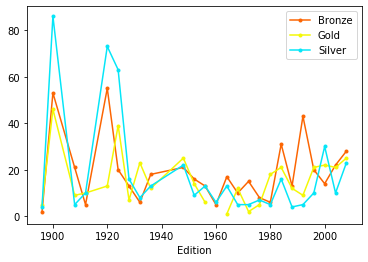

In [73]:
french_medals.plot(kind='line', marker='.', color=['#FC6502', '#F4F805', '#05E6F8'])
plt.show()

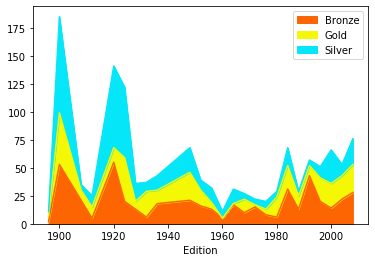

In [74]:
french_medals.plot(kind='area', color=['#FC6502', '#F4F805', '#05E6F8'])
plt.show()